# Diabetes (clustering)

다음의 당뇨 데이터의 혈압, 당뇨진행 정도 데이터를 이용하여 군집화(clustering)하여라.

- sklearn을 이용하지 않고 (자신의 코드로)
- sklearn을 이용해서
- cluster 수를 결정하는 좋은 방법을 고안하여 적용해보아라.

In [1]:
from sklearn import datasets

In [2]:
diabetes=datasets.load_diabetes()

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
diabetes.DESCR #빈도수

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

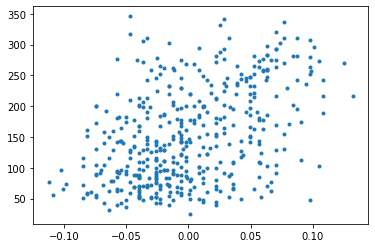

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X_p=diabetes.data[:,3] #혈압
X_d=diabetes.target
plt.plot(X_p,X_d,'.')

### 1.

In [6]:
c1=[-0.06,120]; c2=[0,140];  c3=[0.07,200]
cen=[[-0.06,0,0.07],[120,140,200]]

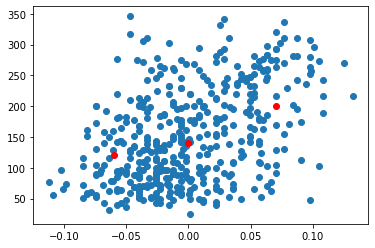

In [7]:
plt.scatter(X_p,X_d)
plt.plot(cen[0],cen[1],'ro')

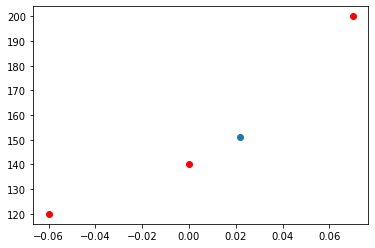

In [8]:
plt.scatter(X_p[0],X_d[0])
plt.plot(cen[0],cen[1],'ro')

In [9]:
(X_p-c1[0])**2

array([6.70308251e-03, 1.13381471e-03, 2.95168256e-03, 5.44921476e-04,
       6.70308251e-03, 1.64494379e-03, 1.93606841e-03, 1.60350743e-02,
       3.96037164e-04, 7.17512505e-04, 4.63772880e-03, 7.17512505e-04,
       2.58943779e-03, 4.63772880e-03, 2.25089974e-03, 1.97124848e-02,
       1.19717124e-02, 1.35259370e-02, 5.44921476e-04, 3.96037164e-04,
       2.70859570e-04, 3.74729224e-03, 2.58943779e-03, 8.29071139e-03,
       1.37752590e-03, 3.96037164e-04, 1.13381471e-03, 3.96037164e-04,
       2.11063494e-04, 1.51749885e-02, 1.64494379e-03, 4.58549366e-04,
       7.87799967e-03, 3.33763404e-03, 7.21636371e-06, 1.14911839e-04,
       1.27369713e-02, 7.21636371e-06, 2.48426491e-02, 2.11063494e-04,
       6.70308251e-03, 2.39676155e-03, 2.03837811e-03, 1.22880633e-04,
       4.63772880e-03, 8.50101833e-03, 7.17512505e-04, 7.21636371e-06,
       5.11850715e-03, 2.95168256e-03, 5.62299222e-03, 7.87799967e-03,
       2.95168256e-03, 1.69188669e-02, 4.63772880e-03, 5.44921476e-04,
      

In [10]:
(X_d-c2[1])**2

array([1.2100e+02, 4.2250e+03, 1.0000e+00, 4.3560e+03, 2.5000e+01,
       1.8490e+03, 4.0000e+00, 5.9290e+03, 9.0000e+02, 2.8900e+04,
       1.5210e+03, 5.0410e+03, 1.5210e+03, 2.0250e+03, 4.8400e+02,
       9.6100e+02, 6.7600e+02, 1.6000e+01, 1.8490e+03, 7.8400e+02,
       5.1840e+03, 8.2810e+03, 5.1840e+03, 1.1025e+04, 1.9360e+03,
       3.8440e+03, 9.0000e+00, 3.0250e+03, 8.1000e+01, 2.0449e+04,
       1.2100e+02, 6.5610e+03, 4.0401e+04, 2.8090e+03, 5.6250e+03,
       1.4440e+03, 1.5625e+04, 1.8496e+04, 1.2544e+04, 2.5000e+03,
       1.6000e+03, 7.2250e+03, 6.2410e+03, 2.3040e+03, 1.4161e+04,
       7.5690e+03, 2.5000e+03, 4.0000e+00, 4.2250e+03, 4.0000e+00,
       2.2500e+02, 7.2250e+03, 6.5610e+03, 1.2960e+03, 1.7640e+03,
       1.4400e+02, 7.7440e+03, 1.0609e+04, 9.0000e+02, 9.0000e+02,
       6.2410e+03, 1.6000e+01, 7.7440e+03, 1.4400e+02, 4.7610e+03,
       5.2900e+02, 1.0000e+02, 1.8490e+03, 4.0000e+02, 1.4440e+03,
       8.4640e+03, 1.6900e+04, 3.8440e+03, 8.4100e+02, 3.0250e

In [11]:
r1= ((X_p-c1[0])**2 + (X_d-c1[1])**2)**(1/2)
r2= ((X_p-c2[0])**2 + (X_d-c2[1])**2)**(1/2)
r3= ((X_p-c3[0])**2 + (X_d-c3[1])**2)**(1/2)

In [12]:
r1

array([3.10001081e+01, 4.50000126e+01, 2.10000703e+01, 8.60000032e+01,
       1.50002234e+01, 2.30000358e+01, 1.80000538e+01, 5.70001407e+01,
       1.00000198e+01, 1.90000002e+02, 1.90001220e+01, 5.10000070e+01,
       5.90000219e+01, 6.50000357e+01, 2.00056265e+00, 5.10001933e+01,
       4.60001301e+01, 2.40002818e+01, 2.30000118e+01, 4.80000041e+01,
       5.20000026e+01, 7.10000264e+01, 5.20000249e+01, 1.25000033e+02,
       6.40000108e+01, 8.20000024e+01, 1.70000333e+01, 3.50000057e+01,
       1.10000096e+01, 1.63000047e+02, 9.00009139e+00, 6.10000038e+01,
       2.21000018e+02, 3.30000506e+01, 5.50000001e+01, 1.80000032e+01,
       1.45000044e+02, 1.56000000e+02, 1.32000094e+02, 3.00000035e+01,
       2.00001676e+01, 6.50000184e+01, 5.90000173e+01, 2.80000022e+01,
       1.39000017e+02, 6.70000634e+01, 7.00000051e+01, 2.20000002e+01,
       4.50000569e+01, 2.20000671e+01, 3.50000803e+01, 1.05000038e+02,
       6.10000242e+01, 1.60005287e+01, 6.20000374e+01, 8.00003406e+00,
      

In [13]:
r2

array([1.10000217e+01, 6.50000053e+01, 1.00001608e+00, 6.60000102e+01,
       5.00004784e+00, 4.30000044e+01, 2.00006399e+00, 7.70000288e+01,
       3.00000268e+01, 1.70000003e+02, 3.90000008e+01, 7.10000078e+01,
       3.90000011e+01, 4.50000007e+01, 2.20000036e+01, 3.10001043e+01,
       2.60000470e+01, 4.00039621e+00, 4.30000156e+01, 2.80000287e+01,
       7.20000132e+01, 9.10000000e+01, 7.20000006e+01, 1.05000005e+02,
       4.40000060e+01, 6.20000130e+01, 3.00011552e+00, 5.50000146e+01,
       9.00030857e+00, 1.43000014e+02, 1.10000172e+01, 8.10000409e+01,
       2.01000002e+02, 5.30000000e+01, 7.50000219e+01, 3.80000320e+01,
       1.25000011e+02, 1.36000012e+02, 1.12000043e+02, 5.00000555e+01,
       4.00000060e+01, 8.50000698e+01, 7.90000014e+01, 4.80000526e+01,
       1.19000000e+02, 8.70000060e+01, 5.00000110e+01, 2.00082105e+00,
       6.50000010e+01, 2.00000804e+00, 1.50000075e+01, 8.50000049e+01,
       8.10000002e+01, 3.60000682e+01, 4.20000008e+01, 1.20000560e+01,
      

In [14]:
r3

array([4.90000236e+01, 1.25000037e+02, 5.90000485e+01, 6.00094789e+00,
       6.50000178e+01, 1.03000039e+02, 6.20000596e+01, 1.37000000e+02,
       9.00000673e+01, 1.10000048e+02, 9.90000194e+01, 1.31000041e+02,
       2.10001490e+01, 1.50001277e+01, 8.20000416e+01, 2.90000019e+01,
       3.40000062e+01, 5.60000017e+01, 1.03000055e+02, 3.20001894e+01,
       1.32000049e+02, 1.51000016e+02, 1.32000024e+02, 4.50000169e+01,
       1.60002696e+01, 2.00302817e+00, 6.30000736e+01, 1.15000053e+02,
       6.90001514e+01, 8.30000003e+01, 7.10000563e+01, 1.41000081e+02,
       1.41000006e+02, 1.13000023e+02, 1.35000060e+02, 9.80000726e+01,
       6.50000023e+01, 7.60001066e+01, 5.20000073e+01, 1.10000095e+02,
       1.00000012e+02, 1.45000110e+02, 1.39000026e+02, 1.08000092e+02,
       5.90000325e+01, 1.47000005e+02, 1.00005326e+01, 5.80001397e+01,
       1.25000014e+02, 5.80000494e+01, 4.50000336e+01, 2.50000340e+01,
       1.41000020e+02, 9.60000000e+01, 1.80001064e+01, 7.20000790e+01,
      

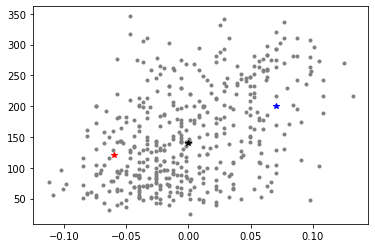

In [15]:
plt.plot(X_p,X_d,'.',color='gray')
plt.plot([-0.06],[120],'r*')
plt.plot([0],[140],'k*')
plt.plot([0.07],[200],'b*')

In [16]:
temp=[]
for (i,j) in zip(X_p,X_d):
    r1=(i+0.06)**2 + (j-120)**2
    r2=(i-0)**2 + (j-140)**2
    r3=(i-0.07)**2 + (j-200)**2
    m=min(r1,r2,r3)
    temp.append([r1,r2,r3].index(m))

In [17]:
x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X_p,X_d) if(t==0)])
x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X_p,X_d) if(t==1)])
x3=np.transpose([[i,j] for (t,i,j) in zip(temp,X_p,X_d) if(t==2)])
r1=np.mean(x1[0]),np.mean(x1[1])
r2=np.mean(x2[0]),np.mean(x2[1])
r3=np.mean(x3[0]),np.mean(x3[1])

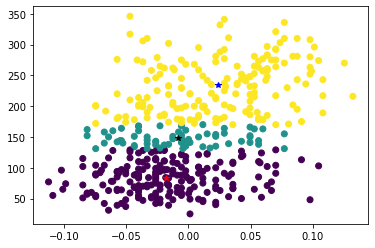

In [18]:
plt.scatter(X_p,X_d,c=temp)
plt.plot(r1[0],r1[1],'r*')
plt.plot(r2[0],r2[1],'k*')
plt.plot(r3[0],r3[1],'b*')

### 2.

In [19]:
from sklearn.cluster import KMeans
X=[X_p,X_d]
kmeans = KMeans(n_clusters = 3)
data = np.transpose(X)
kmeans.fit(data)

KMeans(n_clusters=3)

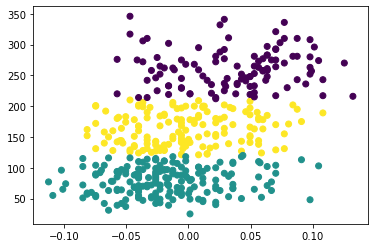

In [20]:
plt.scatter(X[0],X[1],c=kmeans.labels_)

In [21]:
kmeans.inertia_

296608.53206791554

In [22]:
kiner = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    kiner[k] = kmeans.inertia_

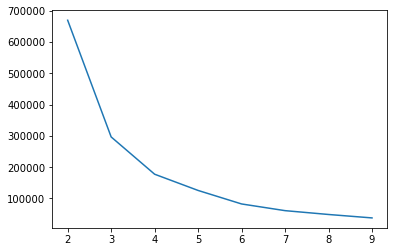

In [23]:
plt.plot(list(kiner.keys()), list(kiner.values()))

### 3.

위 그래프는 cluster 변화에 따른 inertia value에 따른 그래프이다.
inertia vlaue는 center와 데이터 간의 거리를 더한것이므로 작을수록 군집화가 잘 된 것이라고 볼 수 있다.
그래프에서 cluster=3일때 급격하게 줄어듦으로 cluster수는 3 이상일 때로 결정하는 것이 좋으며,4이후부터는 변화의 폭이 작으므로 4정도로 결정하는 것이 좋다고 생각한다. 